In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
raw_data = pd.read_csv("data.csv")
raw_data = raw_data.drop(8).reset_index(drop=True) # sceptre outlier
raw_data["Coattail"] = raw_data["Coattail"].map({"Yes": 1, "No": 0})
data = raw_data[["Company","Coattail","Market Cap (C$ MM)","Sup Vote/Econ","Premium %"]]
MAGNA = data[data["Company"] == "Magna"].copy()
data = data.dropna().reset_index(drop=True)

In [21]:
X = data.iloc[:,1:-1]
Y = data.iloc[:,-1]

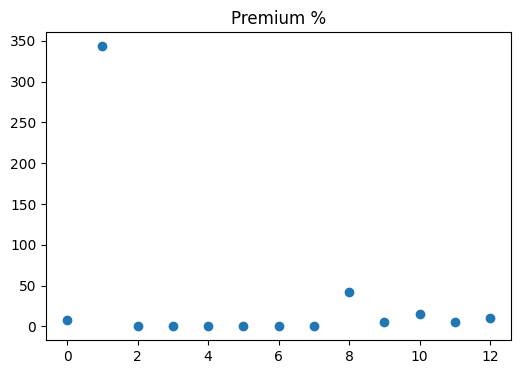

In [22]:
Y.plot(style="o", figsize=(6,4), title="Premium %")
plt.show()

In [23]:
#from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler

In [24]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
# Add a constant term for the intercept
X_with_const = sm.add_constant(X_scaled)

ols_model = sm.OLS(Y, X_with_const).fit()

print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:              Premium %   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     54.05
Date:                Sun, 05 Oct 2025   Prob (F-statistic):           4.44e-06
Time:                        19:37:18   Log-Likelihood:                -57.844
No. Observations:                  13   AIC:                             123.7
Df Residuals:                       9   BIC:                             125.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.8184      8

In [33]:
MAGNA_X = MAGNA.loc[MAGNA["Company"]=="Magna", X.columns]
MAGNA_SCALED = pd.DataFrame(scaler.transform(MAGNA_X),columns=X.columns)
X_new_with_const = sm.add_constant(MAGNA_SCALED, has_constant='add')
y_new_pred = ols_model.predict(X_new_with_const)
y_new_pred

0    766.882993
dtype: float64